# Association Rules Exercise

## Q1

In the first exercise, use the `supermarket.csv` file
This dataset contains 8 shopping baskets in item list format.

Import this dataset as transaction data.

Think about parameters including `format`, `sep`, and `rm.duplicates`

Write your code below:

In [4]:
library("arules")
supermarket <- read.transactions("supermarket.csv", format="basket", sep=",", rm.duplicates = TRUE)

## Q2

Understand the supermarket data.

Which unique items are there in all shopping baskets?

Write your code below:

In [5]:
itemInfo(supermarket)

labels
<chr>
Bread
Butter
Cereal
Cheese
Ice Cream
Juice
Milk


## Q3

How many transactions contain purchases of Butter?

Write your code below:

In [8]:
inspect(subset(supermarket, items %in% "Butter"))

    items                             
[1] {Bread,Butter,Ice Cream,Juice}    
[2] {Bread,Butter,Cereal,Cheese,Juice}


How many transactions contain purchase of Butter and Cheese?
Write your code below:

In [9]:
inspect(subset(supermarket, items %ain% c("Butter", "Cheese")))

    items                             
[1] {Bread,Butter,Cereal,Cheese,Juice}


# Q4

Plot the support percentage of each item, for the top 4 items.
Write your code below:

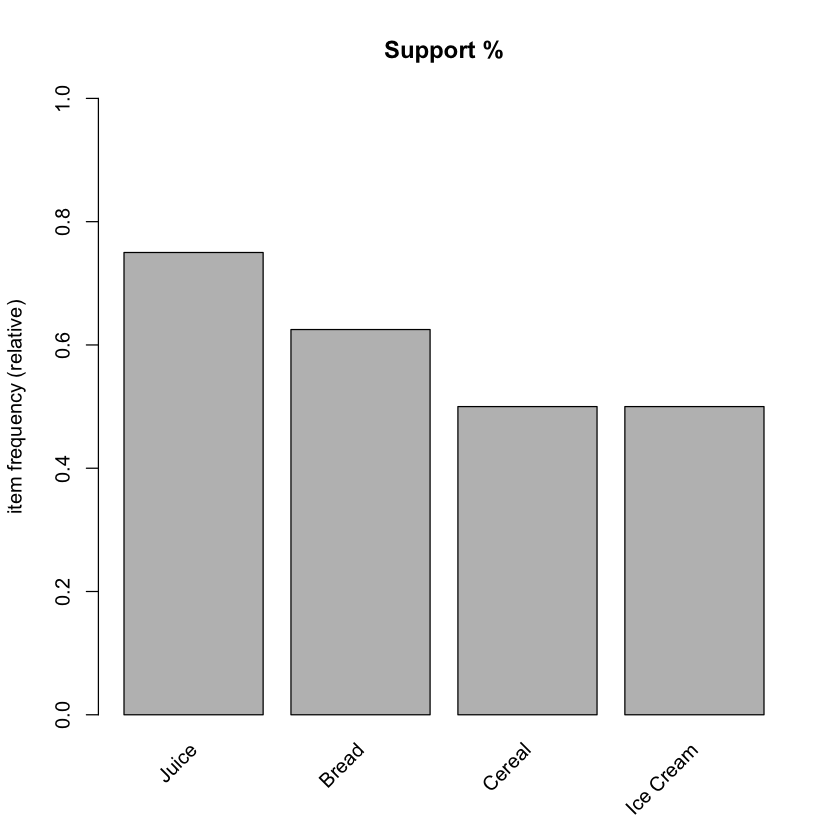

In [38]:
itemFrequencyPlot(supermarket, ylim = c(0, 1), main = "Support %", topN = 4)

## Q5: Mine association rules

Find all association rules with `minsupp = 0.375` and `minconf = 0.65` and with a min number of items = 2

Write your code below:

In [15]:
temp <- apriori(supermarket, parameter = list(supp = 0.375, conf = 0.65, minlen = 2, target = "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.65    0.1    1 none FALSE            TRUE       5   0.375      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[7 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [16]:
inspect(temp)

    lhs            rhs     support confidence coverage lift     count
[1] {Ice Cream} => {Bread} 0.375   0.7500000  0.500    1.200000 3    
[2] {Cereal}    => {Juice} 0.375   0.7500000  0.500    1.000000 3    
[3] {Bread}     => {Juice} 0.500   0.8000000  0.625    1.066667 4    
[4] {Juice}     => {Bread} 0.500   0.6666667  0.750    1.066667 4    


## Q6

Inspect the found rules, in the order of decreasing lift ratio

Write your code below:

In [21]:
inspect(sort(temp, by="lift", decreasing = TRUE))

    lhs            rhs     support confidence coverage lift     count
[1] {Ice Cream} => {Bread} 0.375   0.7500000  0.500    1.200000 3    
[2] {Bread}     => {Juice} 0.500   0.8000000  0.625    1.066667 4    
[3] {Juice}     => {Bread} 0.500   0.6666667  0.750    1.066667 4    
[4] {Cereal}    => {Juice} 0.375   0.7500000  0.500    1.000000 3    


# Part 2

In the second exercise, we use the `book.csv` file. This dataset contains 2000 book purchases in a binary matrix format.

## Q1

Import this dataset as transaction data

Write your code below:

In [39]:
book_csv <- read.csv("book.csv")
book_mat <- as.matrix(book_csv)
book <- as(book_mat, "transactions")
inspect(head(book))

    items                                     
[1] {YouthBks,DoItYBks,GeogBks}               
[2] {ChildBks}                                
[3] {}                                        
[4] {ChildBks,YouthBks,CookBks,RefBks,GeogBks}
[5] {CookBks,GeogBks}                         
[6] {ChildBks,ArtBks,Florence}                


## Q2

Plot the frequency plot, using absolute count. Which book category sells best? 

Write your code below:

In [32]:
length(itemInfo(book)[,])

[1] 11

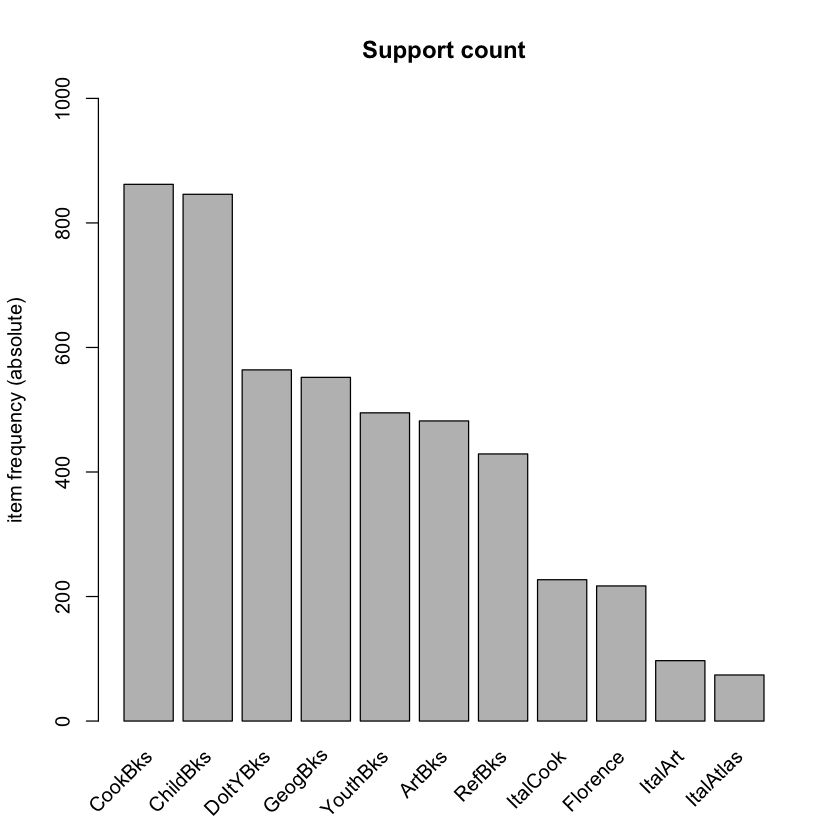

In [40]:
itemFrequencyPlot(book, type = "absolute", ylim = c(0, 1000), main = "Support count", topN = 11)

## Q3: Mine association rules

Find all association rules with `minsupp = 0.1` and `minconf = 0.8`

Write your code below:

In [41]:
book_rules <- apriori(book, parameter = list(supp = 0.1, conf = 0.8, target = "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 200 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 2000 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [7 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


## Q4: Understand the rules

Inspect the rules, and answer the following questions:

- Which rule has the highest lift? What does it tell us?

- What can be done with this rule, if you were the bookstore manager?

Write your code below:

In [42]:
inspect(sort(book_rules, by = "lift"))

    lhs                   rhs        support confidence coverage lift     count
[1] {ItalCook}         => {CookBks}  0.1135  1.0000000  0.1135   2.320186 227  
[2] {DoItYBks,ArtBks}  => {CookBks}  0.1015  0.8218623  0.1235   1.906873 203  
[3] {DoItYBks,GeogBks} => {CookBks}  0.1085  0.8188679  0.1325   1.899926 217  
[4] {CookBks,RefBks}   => {ChildBks} 0.1225  0.8032787  0.1525   1.899004 245  
[5] {ArtBks,GeogBks}   => {ChildBks} 0.1020  0.8000000  0.1275   1.891253 204  
[6] {ArtBks,GeogBks}   => {CookBks}  0.1035  0.8117647  0.1275   1.883445 207  
[7] {ChildBks,RefBks}  => {CookBks}  0.1225  0.8085809  0.1515   1.876058 245  


## Q5: Plot the rules using `arulezViz`

Load the package `arulesViz`, plot a graph of the rules:

Loading required package: grid



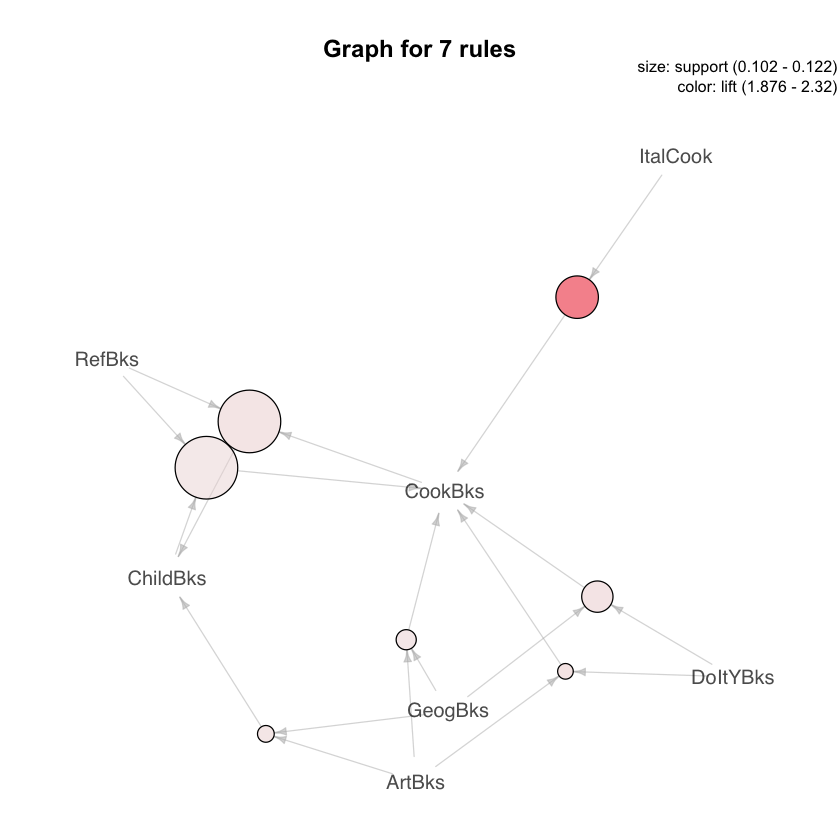

In [43]:
library(arulesViz)
plot(book_rules, method = "graph")

Finally, plot a scatterplot, where the shading changes depending on the confidence:

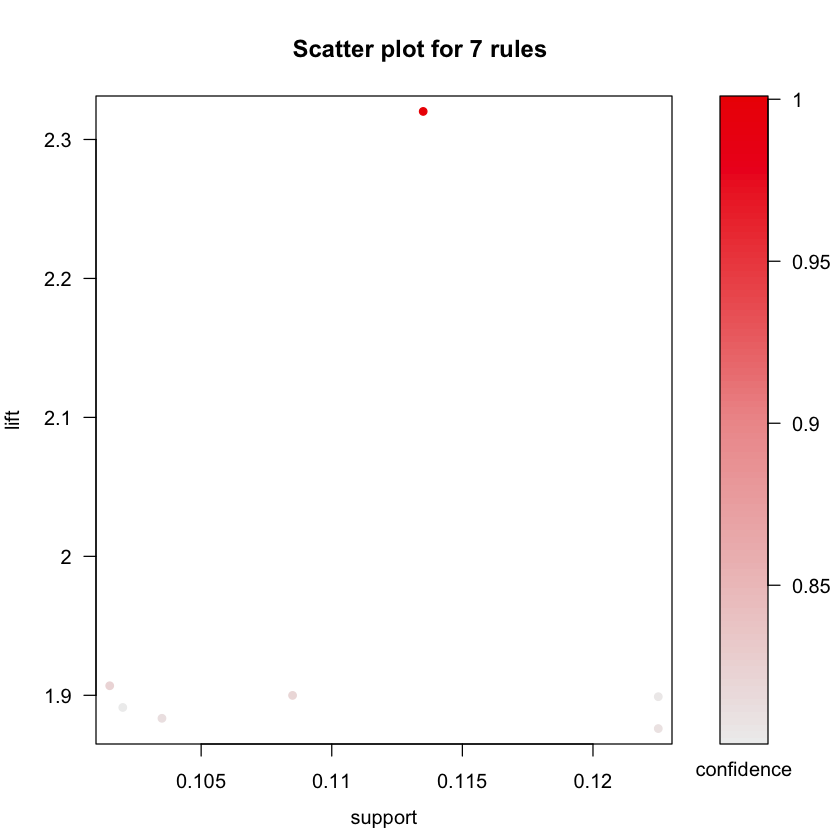

In [44]:
plot(book_rules, measure = c("support", "lift"), shading = "confidence")